### HR Analytics Neural Network in Keras
The goal of the notebook is for us to create a neural network model in Keras that can help us predictively identify whether an employee is likely to leave the company, by using employee records as input features and as targets a binary classification (0/1); left=1; stay=0. We also compare the model performance using LeakyReLU and normal relu activations.

We will create employment categories, which allows us to view the overall distribution of employees according to category and which will also allow us to compare employee performance according to their categorical averages and standard deviations to create numerical representations of "overperformance" and "underperformance".

Using these performance metrics, we will be able to identify likely to leave employees that offer "overperformance" that should be incentivized to remain at the company as well as employees that offer "underperformance" that could be considered for retrenchment if it becomes a necessary for the survival of the company.

Finally, we look at some inter business unit performance.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('HR_comma_sep.csv')

Looking at a single row entry of the dataset we see a single employee entry, which has information which might be indicative of whether an employee might want to leave the company.

In [5]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [6]:
print("Number of dataset entries :", df.shape[0]*df.shape[1])
print("Rows, Columns: ", df.shape)

Number of dataset entries : 149990
Rows, Columns:  (14999, 10)


We drop the "left" column because we want to use this as the target for our model to train on. The remaining data is used as the input data(features). Our targets are the entire "left" column.

In [7]:
features = df.drop('left', axis=1)

In [8]:
targets = df['left']

Below we see that almost a quarter of all employee records are those of employees that have left.

In [9]:
print("Left entries :", targets.sum())
print("% of employees that leave :", (np.round(targets.sum()/len(targets),4))*100)

Left entries : 3571
% of employees that leave : 23.81


Importing the necessary packages.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In the "sales" and "salary" columns we have categorical entries which we will need to convert to numbers. Below we check the unique entries in each column.

In [11]:
print("Sales column categories: ", features['sales'].unique())
print("Salary column categories: ", features['salary'].unique())

Sales column categories:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Salary column categories:  ['low' 'medium' 'high']


Below we create numeric versions of the "sales" and "salary" columns by fitting and then transforming using sklearn's label encoder.

In [12]:
le = LabelEncoder()
le.fit(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'])
encoded_sales = le.transform(features['sales'])
encoded_sales = pd.DataFrame(encoded_sales)
encoded_sales.columns = ['sales']
le.fit(['low','medium','high'])
encoded_salary = le.transform(features['salary'])
encoded_salary = pd.DataFrame(encoded_salary)
encoded_salary.columns = ['salary']

Below we drop the current non-numeric columns in the feature data, then we concatenate back our own numeric versions of the features.

In [13]:
features = features.drop(['sales', 'salary'], axis=1)
features = [features, encoded_sales, encoded_salary]
features = pd.concat(features, axis=1)
features.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1


Splitting the feature and target data into training and testing sets and scaling the training feature data.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Defining both the normal relu model ("nmodel"); and the leaky relu model ("model").These models has not been optimized for hyperparameters. Looking to perhaps include a GridSearch in future.

In [22]:
nmodel = Sequential()
nmodel.add(Dense(50, input_dim=9, activation='relu', kernel_initializer='normal'))
nmodel.add(Dropout(0.2))
nmodel.add(Dense(25, activation='relu', kernel_initializer='normal'))
nmodel.add(Dropout(0.2))
nmodel.add(Dense(12, activation='relu', kernel_initializer='normal'))
nmodel.add(Dense(1))
nmodel.compile(loss='binary_crossentropy', optimizer='adam')
nhistory = nmodel.fit(X_train, y_train, batch_size=32, verbose=2, epochs=100,
                   validation_data=(X_test, y_test))

Train on 11249 samples, validate on 3750 samples
Epoch 1/100
2s - loss: 0.5663 - val_loss: 0.3943
Epoch 2/100
1s - loss: 0.3701 - val_loss: 0.2748
Epoch 3/100
1s - loss: 0.3376 - val_loss: 0.2445
Epoch 4/100
1s - loss: 0.3298 - val_loss: 0.3478
Epoch 5/100
1s - loss: 0.3270 - val_loss: 0.2342
Epoch 6/100
1s - loss: 0.3025 - val_loss: 0.2463
Epoch 7/100
1s - loss: 0.3045 - val_loss: 0.2572
Epoch 8/100
1s - loss: 0.2834 - val_loss: 0.2152
Epoch 9/100
1s - loss: 0.2759 - val_loss: 0.2434
Epoch 10/100
1s - loss: 0.2762 - val_loss: 0.1974
Epoch 11/100
1s - loss: 0.2747 - val_loss: 0.1971
Epoch 12/100
1s - loss: 0.2830 - val_loss: 0.1891
Epoch 13/100
1s - loss: 0.2520 - val_loss: 0.2025
Epoch 14/100
1s - loss: 0.2428 - val_loss: 0.1834
Epoch 15/100
1s - loss: 0.2548 - val_loss: 0.3990
Epoch 16/100
1s - loss: 0.3164 - val_loss: 0.2321
Epoch 17/100
1s - loss: 0.3011 - val_loss: 0.2490
Epoch 18/100
1s - loss: 0.2680 - val_loss: 0.1670
Epoch 19/100
1s - loss: 0.2456 - val_loss: 0.1959
Epoch 20/1

In [23]:
model = Sequential()
model.add(Dense(50, input_dim=9, activation='linear', kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.02))
model.add(Dense(25, activation='linear', kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.02))
model.add(Dense(12, activation='linear', kernel_initializer='normal'))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam')
history = model.fit(X_train, y_train, batch_size=32, verbose=2, epochs=100,
                   validation_data=(X_test, y_test))

Train on 11249 samples, validate on 3750 samples
Epoch 1/100
2s - loss: 0.5157 - val_loss: 0.3824
Epoch 2/100
1s - loss: 0.3682 - val_loss: 0.2690
Epoch 3/100
1s - loss: 0.3430 - val_loss: 0.2884
Epoch 4/100
1s - loss: 0.3663 - val_loss: 0.2657
Epoch 5/100
1s - loss: 0.3287 - val_loss: 0.2754
Epoch 6/100
1s - loss: 0.2910 - val_loss: 0.2388
Epoch 7/100
1s - loss: 0.3228 - val_loss: 0.2375
Epoch 8/100
1s - loss: 0.3452 - val_loss: 0.2529
Epoch 9/100
1s - loss: 0.6186 - val_loss: 0.2532
Epoch 10/100
1s - loss: 0.5144 - val_loss: 0.2645
Epoch 11/100
1s - loss: 0.3616 - val_loss: 0.2573
Epoch 12/100
1s - loss: 0.3251 - val_loss: 0.2330
Epoch 13/100
1s - loss: 0.3144 - val_loss: 0.2165
Epoch 14/100
1s - loss: 0.2937 - val_loss: 0.2308
Epoch 15/100
1s - loss: 0.2905 - val_loss: 0.2063
Epoch 16/100
1s - loss: 0.3160 - val_loss: 0.2390
Epoch 17/100
1s - loss: 0.4200 - val_loss: 0.3489
Epoch 18/100
1s - loss: 0.4034 - val_loss: 0.2623
Epoch 19/100
1s - loss: 0.3444 - val_loss: 0.2254
Epoch 20/1

Saving our models to disk.

In [24]:
from keras.models import model_from_json
import os

model_ = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_)
model.save_weights("model.h5")
print("Saved to disk")

nmodel_ = nmodel.to_json()
with open("nmodel.json", "w") as json_file:
    json_file.write(nmodel_)
nmodel.save_weights("nmodel.h5")
print("Saved to disk")

Saved to disk
Saved to disk


Loading our saved model structures and weights into new variables.

In [14]:
from keras.models import model_from_json
import os

file_ = open('model.json', 'r')
loaded_model_ = file_.read()
file_.close()
loaded_model = model_from_json(loaded_model_)
loaded_model.load_weights("model.h5")
loaded_model.compile(loss="binary_crossentropy", optimizer="adam")
print("Loaded from disk")

file_ = open('nmodel.json', 'r')
nloaded_model_ = file_.read()
file_.close()
nloaded_model = model_from_json(nloaded_model_)
nloaded_model.load_weights("nmodel.h5")
nloaded_model.compile(loss="binary_crossentropy", optimizer="adam")
print("Loaded from disk")

Loaded from disk
Loaded from disk


Plotting train and test loss versus epochs.

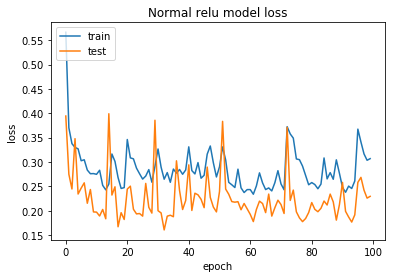

In [27]:
plt.plot(nhistory.history['loss'])
plt.plot(nhistory.history['val_loss'])
plt.title('Normal relu model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

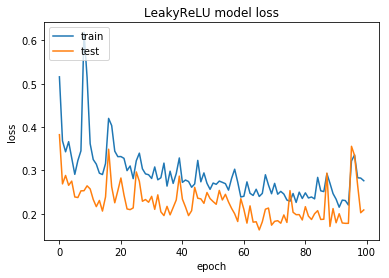

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LeakyReLU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

Importing accuracy score from sklearn to determine the model's accuracy.

In [20]:
from sklearn.metrics import accuracy_score

y_pred = loaded_model.predict(scaler.transform(features))
y_true = targets.astype(int)
y_true = pd.DataFrame(y_true)

ny_pred = nloaded_model.predict(scaler.transform(features))
ny_true = targets.astype(int)
ny_true = pd.DataFrame(ny_true)

Rounding prediction values < 0.5 to 0 and prediction values > 0.5 to 1.

In [21]:
import numpy as np

y_pred = np.clip(np.around(y_pred), 0, 1)
y_pred = y_pred.astype(int)
y_pred = pd.DataFrame(y_pred)

ny_pred = np.clip(np.around(ny_pred), 0, 1)
ny_pred = ny_pred.astype(int)
ny_pred = pd.DataFrame(ny_pred)

Over all our data, it seems that the Leaky ReLU model seems to perform about 2% better.

In [30]:
nscore = accuracy_score(ny_true, ny_pred)
score = accuracy_score(y_true, y_pred)
print("% Normal relu accuracy predicting whether an employee has left or not:", np.round(nscore,4)*100)
print("% Leaky ReLU accuracy predicting whether an employee has left or not:", np.round(score,4)*100)

% Normal relu accuracy predicting whether an employee has left or not: 94.78
% Leaky ReLU accuracy predicting whether an employee has left or not: 96.73


Below we determine what the model accuracy is using only the data of the employees that have left. In other words, what % of employees that actually leave have been identified by our model as employees that have left.

In [16]:
left_employees = df
left_employees = df[df['left']>0]
left_employees = left_employees.drop('left', axis=1)
le = LabelEncoder()
le.fit(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'])
encoded_sales_left = le.transform(left_employees['sales'])
encoded_sales_left = pd.DataFrame(encoded_sales_left)
encoded_sales_left.columns = ['sales']
le.fit(['low','medium','high'])
encoded_salary_left = le.transform(left_employees['salary'])
encoded_salary_left = pd.DataFrame(encoded_salary_left)
encoded_salary_left.columns = ['salary']
left_employees = left_employees.drop(['sales', 'salary'], axis=1)
left_employees = pd.DataFrame(left_employees.values)
left_employees = [left_employees, encoded_sales_left, encoded_salary_left]
left_employees = pd.concat(left_employees, axis=1)

In [22]:
left_employees_pred = loaded_model.predict(scaler.transform(left_employees))
left_employees_pred = np.clip(np.around(left_employees_pred), 0, 1)
left_employees_pred = left_employees_pred.astype(int)
left_targets = np.ones_like(left_employees_pred)
left_score = accuracy_score(left_targets, left_employees_pred)

nleft_employees_pred = nloaded_model.predict(scaler.transform(left_employees))
nleft_employees_pred = np.clip(np.around(nleft_employees_pred), 0, 1)
nleft_employees_pred = nleft_employees_pred.astype(int)
left_targets = np.ones_like(nleft_employees_pred)
nleft_score = accuracy_score(left_targets, nleft_employees_pred)
print("Normal relu accuracy % predicting leave for employees who actually leave: ", np.round(nleft_score,4)*100)
print("Leaky ReLU accuracy % predicting leave for employees who actually leave: ", np.round(left_score,4)*100)

Normal relu accuracy % predicting leave for employees who actually leave:  82.67
Leaky ReLU accuracy % predicting leave for employees who actually leave:  89.86


Above it is clear that our Leaky ReLU model is more than 7% more accurate than the normal relu model in identifying employees as "leave" if that have actually left the company.

Below we create a seperate dataframe containing only the entries of the remaining employees (employees that have not left  [left=0]).

In [23]:
stay_employees = df
stay_employees = df[df['left']<1]
stay_employees = stay_employees.drop('left', axis=1)
le = LabelEncoder()
le.fit(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'])
encoded_sales_stay = le.transform(stay_employees['sales'])
encoded_sales_stay = pd.DataFrame(encoded_sales_stay)
encoded_sales_stay.columns = ['sales']
le.fit(['low','medium','high'])
encoded_salary_stay = le.transform(stay_employees['salary'])
encoded_salary_stay = pd.DataFrame(encoded_salary_stay)
encoded_salary_stay.columns = ['salary']
stay_employees = stay_employees.drop(['sales', 'salary'], axis=1)
stay_employees = pd.DataFrame(stay_employees.values)
stay_employees = [stay_employees, encoded_sales_stay, encoded_salary_stay]
stay_employees = pd.concat(stay_employees, axis=1)

Below create model predictions for the remaining employees (leave=0) so that we can identify which employees our model thinks are most likely to want to leave the company.

From here on we use only the Leaky ReLU model because we only need a single result for "leave" likelihood of remaining employees. Our model outputs values between -1.72 and 1.15, the reason for this is just the way that the model is set up. We just clip the values to 0, 1.

In [24]:
stay_employees_prob = loaded_model.predict(scaler.transform(stay_employees))
stay_employees_prob = pd.DataFrame(stay_employees_prob)
stay_employees_prob = np.clip(stay_employees_prob, 0, 1)
stay_employees_prob.describe()

,0
count,11428.000000
mean,0.043040
std,0.108441
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Below we create a histogram of the probabilities of our remaining employees staying at the company. We see that most are likely to stay, but with a few outliers that may want to leave. (< 0.5 = likely to stay) and (> 0.5 = likely to want to leave)

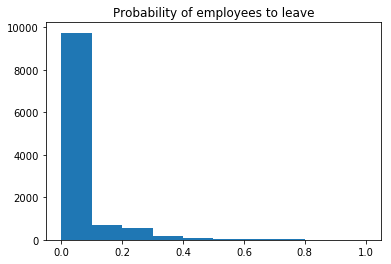

In [221]:
plt.hist(stay_employees_prob.values)
plt.title('Probability of employees to leave')
plt.show()

Below we find the employee records that have over 0.5 probability, the "might leave" employees. Once we have the records of the employees that are likely to leave, we can develop some performance metrics and then determine if we have any high-performance employees that are likely to leave that we could perhaps be incentivized to remain at the company. The index number of the "potential leavers" corresponds to that of the original dataset's index entries for employee records.

In [25]:
stay_employees_prob = pd.DataFrame(stay_employees_prob)
might_leave = stay_employees_prob[stay_employees_prob > 0.5]
might_leave.columns = ['might_leave']
remaining_employees = df[df['left']<1]
remaining_employees = remaining_employees.values
remaining_employees = pd.DataFrame(remaining_employees)
might_leave = np.round(np.clip(might_leave.fillna(0), 0, 1))
might_leave = pd.DataFrame(might_leave)
indexes = list(np.where(might_leave == 1)[0])
likely_to_leave = df[df['left']<1]
potential_leavers = []
for i in indexes:
    potential_leavers.append(likely_to_leave.iloc[i])
potential_leavers = pd.DataFrame(potential_leavers)
potential_leavers.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2011,0.34,0.39,2,136,3,0,0,0,sales,medium
2094,0.48,0.56,2,151,3,0,0,0,hr,medium
2154,0.38,0.94,5,252,5,0,0,0,sales,low
2206,0.16,0.98,5,284,5,0,0,0,IT,medium
2498,0.45,0.52,2,105,3,0,0,0,technical,low


For the purpose of creating performance metrics we will need to compute the average and standard deviations for all "employee categories." In other words we must find the average and standard deviations for all combinations of the below unique entries.

In [125]:
print("Sales column categories: ", df['sales'].unique())
print("Salary column categories: ", df['salary'].unique())

Sales column categories:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Salary column categories:  ['low' 'medium' 'high']


In [26]:
stayers = df[df['left'] < 1]
stayers = stayers.drop('left', axis=1)

Below we create seperate variables that contain the records for each combination of employee category. We count the number in each category and create a dataframe representing the distribution of employees according to category. There is probably an easier and faster way to complete the below operation, any suggestions in this regard would be appreciated.

In [27]:
low_sales = (stayers[(stayers['sales'] == 'sales') & (stayers['salary'] == 'low')])
medium_sales = (stayers[(stayers['sales'] == 'sales') & (stayers['salary'] == 'medium')])
high_sales = (stayers[(stayers['sales'] == 'sales') & (stayers['salary'] == 'high')])

sales = [len(low_sales), len(medium_sales), len(high_sales)]
sales = pd.DataFrame(sales)
sales.columns = ['sales']
sales.index = ['low', 'medium', 'high']

low_accounting = (stayers[(stayers['sales'] == 'accounting') & (stayers['salary'] == 'low')])
medium_accounting = (stayers[(stayers['sales'] == 'accounting') & (stayers['salary'] == 'medium')])
high_accounting = (stayers[(stayers['sales'] == 'accounting') & (stayers['salary'] == 'high')])

accounting = [len(low_accounting), len(medium_accounting), len(high_accounting)]
accounting = pd.DataFrame(accounting)
accounting.columns = ['accounting']
accounting.index = ['low', 'medium', 'high']

low_hr = (stayers[(stayers['sales'] == 'hr') & (stayers['salary'] == 'low')])
medium_hr = (stayers[(stayers['sales'] == 'hr') & (stayers['salary'] == 'medium')])
high_hr = (stayers[(stayers['sales'] == 'hr') & (stayers['salary'] == 'high')])

hr = [len(low_hr), len(medium_hr), len(high_hr)]
hr = pd.DataFrame(hr)
hr.columns = ['hr']
hr.index = ['low', 'medium', 'high']

low_technical = (stayers[(stayers['sales'] == 'technical') & (stayers['salary'] == 'low')])
medium_technical = (stayers[(stayers['sales'] == 'technical') & (stayers['salary'] == 'medium')])
high_technical = (stayers[(stayers['sales'] == 'technical') & (stayers['salary'] == 'high')])

technical = [len(low_technical), len(medium_technical), len(high_technical)]
technical = pd.DataFrame(technical)
technical.columns = ['technical']
technical.index = ['low', 'medium', 'high']

low_support = (stayers[(stayers['sales'] == 'support') & (stayers['salary'] == 'low')])
medium_support = (stayers[(stayers['sales'] == 'support') & (stayers['salary'] == 'medium')])
high_support = (stayers[(stayers['sales'] == 'support') & (stayers['salary'] == 'high')])

support = [len(low_support), len(medium_support), len(high_support)]
support = pd.DataFrame(support)
support.columns = ['support']
support.index = ['low', 'medium', 'high']

low_management = (stayers[(stayers['sales'] == 'management') & (stayers['salary'] == 'low')])
medium_management = (stayers[(stayers['sales'] == 'management') & (stayers['salary'] == 'medium')])
high_management = (stayers[(stayers['sales'] == 'management') & (stayers['salary'] == 'high')])

management = [len(low_management), len(medium_management), len(high_management)]
management = pd.DataFrame(management)
management.columns = ['management']
management.index = ['low', 'medium', 'high']

low_IT = (stayers[(stayers['sales'] == 'IT') & (stayers['salary'] == 'low')])
medium_IT = (stayers[(stayers['sales'] == 'IT') & (stayers['salary'] == 'medium')])
high_IT = (stayers[(stayers['sales'] == 'IT') & (stayers['salary'] == 'high')])

IT = [len(low_IT), len(medium_IT), len(high_IT)]
IT = pd.DataFrame(IT)
IT.columns = ['IT']
IT.index = ['low', 'medium', 'high']

low_product_mng = (stayers[(stayers['sales'] == 'product_mng') & (stayers['salary'] == 'low')])
medium_product_mng = (stayers[(stayers['sales'] == 'product_mng') & (stayers['salary'] == 'medium')])
high_product_mng = (stayers[(stayers['sales'] == 'product_mng') & (stayers['salary'] == 'high')])

product_mng = [len(low_product_mng), len(medium_product_mng), len(high_product_mng)]
product_mng = pd.DataFrame(product_mng)
product_mng.columns = ['product_mng']
product_mng.index = ['low', 'medium', 'high']

low_marketing = (stayers[(stayers['sales'] == 'marketing') & (stayers['salary'] == 'low')])
medium_marketing = (stayers[(stayers['sales'] == 'marketing') & (stayers['salary'] == 'medium')])
high_marketing = (stayers[(stayers['sales'] == 'marketing') & (stayers['salary'] == 'high')])

marketing = [len(low_marketing), len(medium_marketing), len(high_marketing)]
marketing = pd.DataFrame(marketing)
marketing.columns = ['marketing']
marketing.index = ['low', 'medium', 'high']

low_RandD = (stayers[(stayers['sales'] == 'RandD') & (stayers['salary'] == 'low')])
medium_RandD = (stayers[(stayers['sales'] == 'RandD') & (stayers['salary'] == 'medium')])
high_RandD = (stayers[(stayers['sales'] == 'RandD') & (stayers['salary'] == 'high')])

RandD = [len(low_RandD), len(medium_RandD), len(high_RandD)]
RandD = pd.DataFrame(RandD)
RandD.columns = ['RandD']
RandD.index = ['low', 'medium', 'high']

employment = [sales, accounting ,hr ,technical ,support ,management ,IT,
 product_mng, marketing, RandD]
employment = pd.concat(employment, axis=1)
employment

,sales,accounting,hr,technical,support,management,IT,product_mng,marketing,RandD
low,1402,259,243,994,757,121,437,346,276,309
medium,1469,235,242,853,784,194,438,296,308,310
high,255,69,39,176,133,224,79,62,71,47


From the below bar chart we can see that the majority of employees are in "sales" categories, with "technical" and "support" also making up a large percentage of total employment.

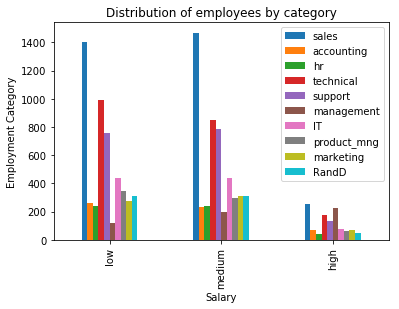

In [219]:
employment.plot(kind='bar', title='Distribution of employees by category')
plt.xlabel('Salary')
plt.ylabel('Employment Category')
plt.show()

Below we calculate the averages and standard deviations for our performance metrics for each category represented in the above bar chart. Our metrics will be  "project_time = number_project/time_spend_company" , which represents the number of projects the employee participated in as a ratio of the time spent at the company as well as  "last_evaluation"  which likely represents managers' assessment of the employee's performance, and finally  "average_monthly_hours"  which represents how much time per month the employee is willing to work. Once again there is probably an easier way to go about the below process, it is repetitive, but quite simple. 

In [28]:
mean_avg_hours_low_sales = low_sales['average_montly_hours'].mean()
std_avg_hours_low_sales = low_sales['average_montly_hours'].std()
mean_last_eval_low_sales = low_sales['last_evaluation'].mean()
std_last_eval_low_sales = low_sales['last_evaluation'].std()
mean_project_time_low_sales = (low_sales['number_project']/low_sales['time_spend_company']).mean()
std_project_time_low_sales = (low_sales['number_project']/low_sales['time_spend_company']).std()

mean_avg_hours_medium_sales = medium_sales['average_montly_hours'].mean()
std_avg_hours_medium_sales = medium_sales['average_montly_hours'].std()
mean_last_eval_medium_sales = medium_sales['last_evaluation'].mean()
std_last_eval_medium_sales = medium_sales['last_evaluation'].std()
mean_project_time_medium_sales = (medium_sales['number_project']/medium_sales['time_spend_company']).mean()
std_project_time_medium_sales = (medium_sales['number_project']/medium_sales['time_spend_company']).std()

mean_avg_hours_high_sales = high_sales['average_montly_hours'].mean()
std_avg_hours_high_sales = high_sales['average_montly_hours'].std()
mean_last_eval_high_sales = high_sales['last_evaluation'].mean()
std_last_eval_high_sales = high_sales['last_evaluation'].std()
mean_project_time_high_sales = (high_sales['number_project']/high_sales['time_spend_company']).mean()
std_project_time_high_sales = (high_sales['number_project']/high_sales['time_spend_company']).std()

mean_avg_hours_low_accounting = low_accounting['average_montly_hours'].mean()
std_avg_hours_low_accounting = low_accounting['average_montly_hours'].std()
mean_last_eval_low_accounting = low_accounting['last_evaluation'].mean()
std_last_eval_low_accounting = low_accounting['last_evaluation'].std()
mean_project_time_low_accounting = (low_accounting['number_project']/low_accounting['time_spend_company']).mean()
std_project_time_low_accounting = (low_accounting['number_project']/low_accounting['time_spend_company']).std()

mean_avg_hours_medium_accounting = medium_accounting['average_montly_hours'].mean()
std_avg_hours_medium_accounting = medium_accounting['average_montly_hours'].std()
mean_last_eval_medium_accounting = medium_accounting['last_evaluation'].mean()
std_last_eval_medium_accounting = medium_accounting['last_evaluation'].std()
mean_project_time_medium_accounting = (medium_accounting['number_project']/medium_accounting['time_spend_company']).mean()
std_project_time_medium_accounting = (medium_accounting['number_project']/medium_accounting['time_spend_company']).std()

mean_avg_hours_high_accounting = high_accounting['average_montly_hours'].mean()
std_avg_hours_high_accounting = high_accounting['average_montly_hours'].std()
mean_last_eval_high_accounting = high_accounting['last_evaluation'].mean()
std_last_eval_high_accounting = high_accounting['last_evaluation'].std()
mean_project_time_high_accounting = (high_accounting['number_project']/high_accounting['time_spend_company']).mean()
std_project_time_high_accounting = (high_accounting['number_project']/high_accounting['time_spend_company']).std()

mean_avg_hours_low_hr = low_hr['average_montly_hours'].mean()
std_avg_hours_low_hr = low_hr['average_montly_hours'].std()
mean_last_eval_low_hr = low_hr['last_evaluation'].mean()
std_last_eval_low_hr = low_hr['last_evaluation'].std()
mean_project_time_low_hr = (low_hr['number_project']/low_hr['time_spend_company']).mean()
std_project_time_low_hr = (low_hr['number_project']/low_hr['time_spend_company']).std()

mean_avg_hours_medium_hr = medium_hr['average_montly_hours'].mean()
std_avg_hours_medium_hr = medium_hr['average_montly_hours'].std()
mean_last_eval_medium_hr = medium_hr['last_evaluation'].mean()
std_last_eval_medium_hr = medium_hr['last_evaluation'].std()
mean_project_time_medium_hr = (medium_hr['number_project']/medium_hr['time_spend_company']).mean()
std_project_time_medium_hr = (medium_hr['number_project']/medium_hr['time_spend_company']).std()

mean_avg_hours_high_hr = high_hr['average_montly_hours'].mean()
std_avg_hours_high_hr = high_hr['average_montly_hours'].std()
mean_last_eval_high_hr = high_hr['last_evaluation'].mean()
std_last_eval_high_hr = high_hr['last_evaluation'].std()
mean_project_time_high_hr = (high_hr['number_project']/high_hr['time_spend_company']).mean()
std_project_time_high_hr = (high_hr['number_project']/high_hr['time_spend_company']).std()

mean_avg_hours_low_technical = low_technical['average_montly_hours'].mean()
std_avg_hours_low_technical = low_technical['average_montly_hours'].std()
mean_last_eval_low_technical = low_technical['last_evaluation'].mean()
std_last_eval_low_technical = low_technical['last_evaluation'].std()
mean_project_time_low_technical = (low_technical['number_project']/low_technical['time_spend_company']).mean()
std_project_time_low_technical = (low_technical['number_project']/low_technical['time_spend_company']).std()

mean_avg_hours_medium_technical = medium_technical['average_montly_hours'].mean()
std_avg_hours_medium_technical = medium_technical['average_montly_hours'].std()
mean_last_eval_medium_technical = medium_technical['last_evaluation'].mean()
std_last_eval_medium_technical = medium_technical['last_evaluation'].std()
mean_project_time_medium_technical = (medium_technical['number_project']/medium_technical['time_spend_company']).mean()
std_project_time_medium_technical = (medium_technical['number_project']/medium_technical['time_spend_company']).std()

mean_avg_hours_high_technical = high_technical['average_montly_hours'].mean()
std_avg_hours_high_technical = high_technical['average_montly_hours'].std()
mean_last_eval_high_technical = high_technical['last_evaluation'].mean()
std_last_eval_high_technical = high_technical['last_evaluation'].std()
mean_project_time_high_technical = (high_technical['number_project']/high_technical['time_spend_company']).mean()
std_project_time_high_technical = (high_technical['number_project']/high_technical['time_spend_company']).std()

mean_avg_hours_low_support = low_support['average_montly_hours'].mean()
std_avg_hours_low_support = low_support['average_montly_hours'].std()
mean_last_eval_low_support = low_support['last_evaluation'].mean()
std_last_eval_low_support = low_support['last_evaluation'].std()
mean_project_time_low_support = (low_support['number_project']/low_support['time_spend_company']).mean()
std_project_time_low_support = (low_support['number_project']/low_support['time_spend_company']).std()

mean_avg_hours_medium_support = medium_support['average_montly_hours'].mean()
std_avg_hours_medium_support = medium_support['average_montly_hours'].std()
mean_last_eval_medium_support = medium_support['last_evaluation'].mean()
std_last_eval_medium_support = medium_support['last_evaluation'].std()
mean_project_time_medium_support = (medium_support['number_project']/medium_support['time_spend_company']).mean()
std_project_time_medium_support = (medium_support['number_project']/medium_support['time_spend_company']).std()

mean_avg_hours_high_support = high_support['average_montly_hours'].mean()
std_avg_hours_high_support = high_support['average_montly_hours'].std()
mean_last_eval_high_support = high_support['last_evaluation'].mean()
std_last_eval_high_support = high_support['last_evaluation'].std()
mean_project_time_high_support = (high_support['number_project']/high_support['time_spend_company']).mean()
std_project_time_high_support = (high_support['number_project']/high_support['time_spend_company']).std()

mean_avg_hours_low_management = low_management['average_montly_hours'].mean()
std_avg_hours_low_management = low_management['average_montly_hours'].std()
mean_last_eval_low_management = low_management['last_evaluation'].mean()
std_last_eval_low_management = low_management['last_evaluation'].std()
mean_project_time_low_management = (low_management['number_project']/low_management['time_spend_company']).mean()
std_project_time_low_management = (low_management['number_project']/low_management['time_spend_company']).std()

mean_avg_hours_medium_management = medium_management['average_montly_hours'].mean()
std_avg_hours_medium_management = medium_management['average_montly_hours'].std()
mean_last_eval_medium_management = medium_management['last_evaluation'].mean()
std_last_eval_medium_management = medium_management['last_evaluation'].std()
mean_project_time_medium_management = (medium_management['number_project']/medium_management['time_spend_company']).mean()
std_project_time_medium_management = (medium_management['number_project']/medium_management['time_spend_company']).std()

mean_avg_hours_high_management = high_management['average_montly_hours'].mean()
std_avg_hours_high_management = high_management['average_montly_hours'].std()
mean_last_eval_high_management = high_management['last_evaluation'].mean()
std_last_eval_high_management = high_management['last_evaluation'].std()
mean_project_time_high_management = (high_management['number_project']/high_management['time_spend_company']).mean()
std_project_time_high_management = (high_management['number_project']/high_management['time_spend_company']).std()

mean_avg_hours_low_IT = low_IT['average_montly_hours'].mean()
std_avg_hours_low_IT = low_IT['average_montly_hours'].std()
mean_last_eval_low_IT = low_IT['last_evaluation'].mean()
std_last_eval_low_IT = low_IT['last_evaluation'].std()
mean_project_time_low_IT = (low_IT['number_project']/low_IT['time_spend_company']).mean()
std_project_time_low_IT = (low_IT['number_project']/low_IT['time_spend_company']).std()

mean_avg_hours_medium_IT = medium_IT['average_montly_hours'].mean()
std_avg_hours_medium_IT = medium_IT['average_montly_hours'].std()
mean_last_eval_medium_IT = medium_IT['last_evaluation'].mean()
std_last_eval_medium_IT = medium_IT['last_evaluation'].std()
mean_project_time_medium_IT = (medium_IT['number_project']/medium_IT['time_spend_company']).mean()
std_project_time_medium_IT = (medium_IT['number_project']/medium_IT['time_spend_company']).std()

mean_avg_hours_high_IT = high_IT['average_montly_hours'].mean()
std_avg_hours_high_IT = high_IT['average_montly_hours'].std()
mean_last_eval_high_IT = high_IT['last_evaluation'].mean()
std_last_eval_high_IT = high_IT['last_evaluation'].std()
mean_project_time_high_IT = (high_IT['number_project']/high_IT['time_spend_company']).mean()
std_project_time_high_IT = (high_IT['number_project']/high_IT['time_spend_company']).std()

mean_avg_hours_low_product_mng = low_product_mng['average_montly_hours'].mean()
std_avg_hours_low_product_mng = low_product_mng['average_montly_hours'].std()
mean_last_eval_low_product_mng = low_product_mng['last_evaluation'].mean()
std_last_eval_low_product_mng = low_product_mng['last_evaluation'].std()
mean_project_time_low_product_mng = (low_product_mng['number_project']/low_product_mng['time_spend_company']).mean()
std_project_time_low_product_mng = (low_product_mng['number_project']/low_product_mng['time_spend_company']).std()

mean_avg_hours_medium_product_mng = medium_product_mng['average_montly_hours'].mean()
std_avg_hours_medium_product_mng = medium_product_mng['average_montly_hours'].std()
mean_last_eval_medium_product_mng = medium_product_mng['last_evaluation'].mean()
std_last_eval_medium_product_mng = medium_product_mng['last_evaluation'].std()
mean_project_time_medium_product_mng = (medium_product_mng['number_project']/medium_product_mng['time_spend_company']).mean()
std_project_time_medium_product_mng = (medium_product_mng['number_project']/medium_product_mng['time_spend_company']).std()

mean_avg_hours_high_product_mng = high_product_mng['average_montly_hours'].mean()
std_avg_hours_high_product_mng = high_product_mng['average_montly_hours'].std()
mean_last_eval_high_product_mng = high_product_mng['last_evaluation'].mean()
std_last_eval_high_product_mng = high_product_mng['last_evaluation'].std()
mean_project_time_high_product_mng = (high_product_mng['number_project']/high_product_mng['time_spend_company']).mean()
std_project_time_high_product_mng = (high_product_mng['number_project']/high_product_mng['time_spend_company']).std()

mean_avg_hours_low_marketing = low_marketing['average_montly_hours'].mean()
std_avg_hours_low_marketing = low_marketing['average_montly_hours'].std()
mean_last_eval_low_marketing = low_marketing['last_evaluation'].mean()
std_last_eval_low_marketing = low_marketing['last_evaluation'].std()
mean_project_time_low_marketing = (low_marketing['number_project']/low_marketing['time_spend_company']).mean()
std_project_time_low_marketing = (low_marketing['number_project']/low_marketing['time_spend_company']).std()

mean_avg_hours_medium_marketing = medium_marketing['average_montly_hours'].mean()
std_avg_hours_medium_marketing = medium_marketing['average_montly_hours'].std()
mean_last_eval_medium_marketing = medium_marketing['last_evaluation'].mean()
std_last_eval_medium_marketing = medium_marketing['last_evaluation'].std()
mean_project_time_medium_marketing = (medium_marketing['number_project']/medium_marketing['time_spend_company']).mean()
std_project_time_medium_marketing = (medium_marketing['number_project']/medium_marketing['time_spend_company']).std()

mean_avg_hours_high_marketing = high_marketing['average_montly_hours'].mean()
std_avg_hours_high_marketing = high_marketing['average_montly_hours'].std()
mean_last_eval_high_marketing = high_marketing['last_evaluation'].mean()
std_last_eval_high_marketing = high_marketing['last_evaluation'].std()
mean_project_time_high_marketing = (high_marketing['number_project']/high_marketing['time_spend_company']).mean()
std_project_time_high_marketing = (high_marketing['number_project']/high_marketing['time_spend_company']).std()

mean_avg_hours_low_RandD = low_RandD['average_montly_hours'].mean()
std_avg_hours_low_RandD = low_RandD['average_montly_hours'].std()
mean_last_eval_low_RandD = low_RandD['last_evaluation'].mean()
std_last_eval_low_RandD = low_RandD['last_evaluation'].std()
mean_project_time_low_RandD = (low_RandD['number_project']/low_RandD['time_spend_company']).mean()
std_project_time_low_RandD = (low_RandD['number_project']/low_RandD['time_spend_company']).std()

mean_avg_hours_medium_RandD = medium_RandD['average_montly_hours'].mean()
std_avg_hours_medium_RandD = medium_RandD['average_montly_hours'].std()
mean_last_eval_medium_RandD = medium_RandD['last_evaluation'].mean()
std_last_eval_medium_RandD = medium_RandD['last_evaluation'].std()
mean_project_time_medium_RandD = (medium_RandD['number_project']/medium_RandD['time_spend_company']).mean()
std_project_time_medium_RandD = (medium_RandD['number_project']/medium_RandD['time_spend_company']).std()

mean_avg_hours_high_RandD = high_RandD['average_montly_hours'].mean()
std_avg_hours_high_RandD = high_RandD['average_montly_hours'].std()
mean_last_eval_high_RandD = high_RandD['last_evaluation'].mean()
std_last_eval_high_RandD = high_RandD['last_evaluation'].std()
mean_project_time_high_RandD = (high_RandD['number_project']/high_RandD['time_spend_company']).mean()
std_project_time_high_RandD = (high_RandD['number_project']/high_RandD['time_spend_company']).std()

Below we calculate our performance metrics for each of our employment categories, we concatenate our performance metrics to our categorical employee records so that our performance metric for each employee record is now visible together with the other employee entries.

In [29]:
low_sales_PM1 = (low_sales['average_montly_hours'] - mean_avg_hours_low_sales) / std_avg_hours_low_sales
low_sales_PM2 = (low_sales['last_evaluation'] - mean_last_eval_low_sales) / std_last_eval_low_sales
low_sales_PM3 = ((low_sales['number_project']/low_sales['time_spend_company']) - (mean_project_time_low_sales)) / std_project_time_low_sales
low_sales_PM = low_sales_PM1 + low_sales_PM2 + low_sales_PM3
low_sales_list = [low_sales, low_sales_PM]
low_sales = pd.concat(low_sales_list, axis=1)
low_sales.rename(columns={0: 'PM'}, inplace=True)

medium_sales_PM1 = (medium_sales['average_montly_hours'] - mean_avg_hours_medium_sales) / std_avg_hours_medium_sales
medium_sales_PM2 = (medium_sales['last_evaluation'] - mean_last_eval_medium_sales) / std_last_eval_medium_sales
medium_sales_PM3 = ((medium_sales['number_project']/medium_sales['time_spend_company']) - (mean_project_time_medium_sales)) / std_project_time_medium_sales
medium_sales_PM = medium_sales_PM1 + medium_sales_PM2 + medium_sales_PM3
medium_sales_list = [medium_sales, medium_sales_PM]
medium_sales = pd.concat(medium_sales_list, axis=1)
medium_sales.rename(columns={0: 'PM'}, inplace=True)

high_sales_PM1 = (high_sales['average_montly_hours'] - mean_avg_hours_high_sales) / std_avg_hours_high_sales
high_sales_PM2 = (high_sales['last_evaluation'] - mean_last_eval_high_sales) / std_last_eval_high_sales
high_sales_PM3 = ((high_sales['number_project']/high_sales['time_spend_company']) - (mean_project_time_high_sales)) / std_project_time_high_sales
high_sales_PM = high_sales_PM1 + high_sales_PM2 + high_sales_PM3
high_sales_list = [high_sales, high_sales_PM]
high_sales = pd.concat(high_sales_list, axis=1)
high_sales.rename(columns={0: 'PM'}, inplace=True)

low_accounting_PM1 = (low_accounting['average_montly_hours'] - mean_avg_hours_low_accounting) / std_avg_hours_low_accounting
low_accounting_PM2 = (low_accounting['last_evaluation'] - mean_last_eval_low_accounting) / std_last_eval_low_accounting
low_accounting_PM3 = ((low_accounting['number_project']/low_accounting['time_spend_company']) - (mean_project_time_low_accounting)) / std_project_time_low_accounting
low_accounting_PM = low_accounting_PM1 + low_accounting_PM2 + low_accounting_PM3
low_accounting_list = [low_accounting, low_accounting_PM]
low_accounting = pd.concat(low_accounting_list, axis=1)
low_accounting.rename(columns={0: 'PM'}, inplace=True)

medium_accounting_PM1 = (medium_accounting['average_montly_hours'] - mean_avg_hours_medium_accounting) / std_avg_hours_medium_accounting
medium_accounting_PM2 = (medium_accounting['last_evaluation'] - mean_last_eval_medium_accounting) / std_last_eval_medium_accounting
medium_accounting_PM3 = ((medium_accounting['number_project']/medium_accounting['time_spend_company']) - (mean_project_time_medium_accounting)) / std_project_time_medium_accounting
medium_accounting_PM = medium_accounting_PM1 + medium_accounting_PM2 + medium_accounting_PM3
medium_accounting_list = [medium_accounting, medium_accounting_PM]
medium_accounting = pd.concat(medium_accounting_list, axis=1)
medium_accounting.rename(columns={0: 'PM'}, inplace=True)

high_accounting_PM1 = (high_accounting['average_montly_hours'] - mean_avg_hours_high_accounting) / std_avg_hours_high_accounting
high_accounting_PM2 = (high_accounting['last_evaluation'] - mean_last_eval_high_accounting) / std_last_eval_high_accounting
high_accounting_PM3 = ((high_accounting['number_project']/high_accounting['time_spend_company']) - (mean_project_time_high_accounting)) / std_project_time_high_accounting
high_accounting_PM = high_accounting_PM1 + high_accounting_PM2 + high_accounting_PM3
high_accounting_list = [high_accounting, high_accounting_PM]
high_accounting = pd.concat(high_accounting_list, axis=1)
high_accounting.rename(columns={0: 'PM'}, inplace=True)

low_hr_PM1 = (low_hr['average_montly_hours'] - mean_avg_hours_low_hr) / std_avg_hours_low_hr
low_hr_PM2 = (low_hr['last_evaluation'] - mean_last_eval_low_hr) / std_last_eval_low_hr
low_hr_PM3 = ((low_hr['number_project']/low_hr['time_spend_company']) - (mean_project_time_low_hr)) / std_project_time_low_hr
low_hr_PM = low_hr_PM1 + low_hr_PM2 + low_hr_PM3
low_hr_list = [low_hr, low_hr_PM]
low_hr = pd.concat(low_hr_list, axis=1)
low_hr.rename(columns={0: 'PM'}, inplace=True)

medium_hr_PM1 = (medium_hr['average_montly_hours'] - mean_avg_hours_medium_hr) / std_avg_hours_medium_hr
medium_hr_PM2 = (medium_hr['last_evaluation'] - mean_last_eval_medium_hr) / std_last_eval_medium_hr
medium_hr_PM3 = ((medium_hr['number_project']/medium_hr['time_spend_company']) - (mean_project_time_medium_hr)) / std_project_time_medium_hr
medium_hr_PM = medium_hr_PM1 + medium_hr_PM2 + medium_hr_PM3
medium_hr_list = [medium_hr, medium_hr_PM]
medium_hr = pd.concat(medium_hr_list, axis=1)
medium_hr.rename(columns={0: 'PM'}, inplace=True)

high_hr_PM1 = (high_hr['average_montly_hours'] - mean_avg_hours_high_hr) / std_avg_hours_high_hr
high_hr_PM2 = (high_hr['last_evaluation'] - mean_last_eval_high_hr) / std_last_eval_high_hr
high_hr_PM3 = ((high_hr['number_project']/high_hr['time_spend_company']) - (mean_project_time_high_hr)) / std_project_time_high_hr
high_hr_PM = high_hr_PM1 + high_hr_PM2 + high_hr_PM3
high_hr_list = [high_hr, high_hr_PM]
high_hr = pd.concat(high_hr_list, axis=1)
high_hr.rename(columns={0: 'PM'}, inplace=True)

low_technical_PM1 = (low_technical['average_montly_hours'] - mean_avg_hours_low_technical) / std_avg_hours_low_technical
low_technical_PM2 = (low_technical['last_evaluation'] - mean_last_eval_low_technical) / std_last_eval_low_technical
low_technical_PM3 = ((low_technical['number_project']/low_technical['time_spend_company']) - (mean_project_time_low_technical)) / std_project_time_low_technical
low_technical_PM = low_technical_PM1 + low_technical_PM2 + low_technical_PM3
low_technical_list = [low_technical, low_technical_PM]
low_technical = pd.concat(low_technical_list, axis=1)
low_technical.rename(columns={0: 'PM'}, inplace=True)

medium_technical_PM1 = (medium_technical['average_montly_hours'] - mean_avg_hours_medium_technical) / std_avg_hours_medium_technical
medium_technical_PM2 = (medium_technical['last_evaluation'] - mean_last_eval_medium_technical) / std_last_eval_medium_technical
medium_technical_PM3 = ((medium_technical['number_project']/medium_technical['time_spend_company']) - (mean_project_time_medium_technical)) / std_project_time_medium_technical
medium_technical_PM = medium_technical_PM1 + medium_technical_PM2 + medium_technical_PM3
medium_technical_list = [medium_technical, medium_technical_PM]
medium_technical = pd.concat(medium_technical_list, axis=1)
medium_technical.rename(columns={0: 'PM'}, inplace=True)

high_technical_PM1 = (high_technical['average_montly_hours'] - mean_avg_hours_high_technical) / std_avg_hours_high_technical
high_technical_PM2 = (high_technical['last_evaluation'] - mean_last_eval_high_technical) / std_last_eval_high_technical
high_technical_PM3 = ((high_technical['number_project']/high_technical['time_spend_company']) - (mean_project_time_high_technical)) / std_project_time_high_technical
high_technical_PM = high_technical_PM1 + high_technical_PM2 + high_technical_PM3
high_technical_list = [high_technical, high_technical_PM]
high_technical = pd.concat(high_technical_list, axis=1)
high_technical.rename(columns={0: 'PM'}, inplace=True)

low_support_PM1 = (low_support['average_montly_hours'] - mean_avg_hours_low_support) / std_avg_hours_low_support
low_support_PM2 = (low_support['last_evaluation'] - mean_last_eval_low_support) / std_last_eval_low_support
low_support_PM3 = ((low_support['number_project']/low_support['time_spend_company']) - (mean_project_time_low_support)) / std_project_time_low_support
low_support_PM = low_support_PM1 + low_support_PM2 + low_support_PM3
low_support_list = [low_support, low_support_PM]
low_support = pd.concat(low_support_list, axis=1)
low_support.rename(columns={0: 'PM'}, inplace=True)

medium_support_PM1 = (medium_support['average_montly_hours'] - mean_avg_hours_medium_support) / std_avg_hours_medium_support
medium_support_PM2 = (medium_support['last_evaluation'] - mean_last_eval_medium_support) / std_last_eval_medium_support
medium_support_PM3 = ((medium_support['number_project']/medium_support['time_spend_company']) - (mean_project_time_medium_support)) / std_project_time_medium_support
medium_support_PM = medium_support_PM1 + medium_support_PM2 + medium_support_PM3
medium_support_list = [medium_support, medium_support_PM]
medium_support = pd.concat(medium_support_list, axis=1)
medium_support.rename(columns={0: 'PM'}, inplace=True)

high_support_PM1 = (high_support['average_montly_hours'] - mean_avg_hours_high_support) / std_avg_hours_high_support
high_support_PM2 = (high_support['last_evaluation'] - mean_last_eval_high_support) / std_last_eval_high_support
high_support_PM3 = ((high_support['number_project']/high_support['time_spend_company']) - (mean_project_time_high_support)) / std_project_time_high_support
high_support_PM = high_support_PM1 + high_support_PM2 + high_support_PM3
high_support_list = [high_support, high_support_PM]
high_support = pd.concat(high_support_list, axis=1)
high_support.rename(columns={0: 'PM'}, inplace=True)

low_management_PM1 = (low_management['average_montly_hours'] - mean_avg_hours_low_management) / std_avg_hours_low_management
low_management_PM2 = (low_management['last_evaluation'] - mean_last_eval_low_management) / std_last_eval_low_management
low_management_PM3 = ((low_management['number_project']/low_management['time_spend_company']) - (mean_project_time_low_management)) / std_project_time_low_management
low_management_PM = low_management_PM1 + low_management_PM2 + low_management_PM3
low_management_list = [low_management, low_management_PM]
low_management = pd.concat(low_management_list, axis=1)
low_management.rename(columns={0: 'PM'}, inplace=True)

medium_management_PM1 = (medium_management['average_montly_hours'] - mean_avg_hours_medium_management) / std_avg_hours_medium_management
medium_management_PM2 = (medium_management['last_evaluation'] - mean_last_eval_medium_management) / std_last_eval_medium_management
medium_management_PM3 = ((medium_management['number_project']/medium_management['time_spend_company']) - (mean_project_time_medium_management)) / std_project_time_medium_management
medium_management_PM = medium_management_PM1 + medium_management_PM2 + medium_management_PM3
medium_management_list = [medium_management, medium_management_PM]
medium_management = pd.concat(medium_management_list, axis=1)
medium_management.rename(columns={0: 'PM'}, inplace=True)

high_management_PM1 = (high_management['average_montly_hours'] - mean_avg_hours_high_management) / std_avg_hours_high_management
high_management_PM2 = (high_management['last_evaluation'] - mean_last_eval_high_management) / std_last_eval_high_management
high_management_PM3 = ((high_management['number_project']/high_management['time_spend_company']) - (mean_project_time_high_management)) / std_project_time_high_management
high_management_PM = high_management_PM1 + high_management_PM2 + high_management_PM3
high_management_list = [high_management, high_management_PM]
high_management = pd.concat(high_management_list, axis=1)
high_management.rename(columns={0: 'PM'}, inplace=True)

low_IT_PM1 = (low_IT['average_montly_hours'] - mean_avg_hours_low_IT) / std_avg_hours_low_IT
low_IT_PM2 = (low_IT['last_evaluation'] - mean_last_eval_low_IT) / std_last_eval_low_IT
low_IT_PM3 = ((low_IT['number_project']/low_IT['time_spend_company']) - (mean_project_time_low_IT)) / std_project_time_low_IT
low_IT_PM = low_IT_PM1 + low_IT_PM2 + low_IT_PM3
low_IT_list = [low_IT, low_IT_PM]
low_IT = pd.concat(low_IT_list, axis=1)
low_IT.rename(columns={0: 'PM'}, inplace=True)

medium_IT_PM1 = (medium_IT['average_montly_hours'] - mean_avg_hours_medium_IT) / std_avg_hours_medium_IT
medium_IT_PM2 = (medium_IT['last_evaluation'] - mean_last_eval_medium_IT) / std_last_eval_medium_IT
medium_IT_PM3 = ((medium_IT['number_project']/medium_IT['time_spend_company']) - (mean_project_time_medium_IT)) / std_project_time_medium_IT
medium_IT_PM = medium_IT_PM1 + medium_IT_PM2 + medium_IT_PM3
medium_IT_list = [medium_IT, medium_IT_PM]
medium_IT = pd.concat(medium_IT_list, axis=1)
medium_IT.rename(columns={0: 'PM'}, inplace=True)

high_IT_PM1 = (high_IT['average_montly_hours'] - mean_avg_hours_high_IT) / std_avg_hours_high_IT
high_IT_PM2 = (high_IT['last_evaluation'] - mean_last_eval_high_IT) / std_last_eval_high_IT
high_IT_PM3 = ((high_IT['number_project']/high_IT['time_spend_company']) - (mean_project_time_high_IT)) / std_project_time_high_IT
high_IT_PM = high_IT_PM1 + high_IT_PM2 + high_IT_PM3
high_IT_list = [high_IT, high_IT_PM]
high_IT = pd.concat(high_IT_list, axis=1)
high_IT.rename(columns={0: 'PM'}, inplace=True)

low_product_mng_PM1 = (low_product_mng['average_montly_hours'] - mean_avg_hours_low_product_mng) / std_avg_hours_low_product_mng
low_product_mng_PM2 = (low_product_mng['last_evaluation'] - mean_last_eval_low_product_mng) / std_last_eval_low_product_mng
low_product_mng_PM3 = ((low_product_mng['number_project']/low_product_mng['time_spend_company']) - (mean_project_time_low_product_mng)) / std_project_time_low_product_mng
low_product_mng_PM = low_product_mng_PM1 + low_product_mng_PM2 + low_product_mng_PM3
low_product_mng_list = [low_product_mng, low_product_mng_PM]
low_product_mng = pd.concat(low_product_mng_list, axis=1)
low_product_mng.rename(columns={0: 'PM'}, inplace=True)

medium_product_mng_PM1 = (medium_product_mng['average_montly_hours'] - mean_avg_hours_medium_product_mng) / std_avg_hours_medium_product_mng
medium_product_mng_PM2 = (medium_product_mng['last_evaluation'] - mean_last_eval_medium_product_mng) / std_last_eval_medium_product_mng
medium_product_mng_PM3 = ((medium_product_mng['number_project']/medium_product_mng['time_spend_company']) - (mean_project_time_medium_product_mng)) / std_project_time_medium_product_mng
medium_product_mng_PM = medium_product_mng_PM1 + medium_product_mng_PM2 + medium_product_mng_PM3
medium_product_mng_list = [medium_product_mng, medium_product_mng_PM]
medium_product_mng = pd.concat(medium_product_mng_list, axis=1)
medium_product_mng.rename(columns={0: 'PM'}, inplace=True)

high_product_mng_PM1 = (high_product_mng['average_montly_hours'] - mean_avg_hours_high_product_mng) / std_avg_hours_high_product_mng
high_product_mng_PM2 = (high_product_mng['last_evaluation'] - mean_last_eval_high_product_mng) / std_last_eval_high_product_mng
high_product_mng_PM3 = ((high_product_mng['number_project']/high_product_mng['time_spend_company']) - (mean_project_time_high_product_mng)) / std_project_time_high_product_mng
high_product_mng_PM = high_product_mng_PM1 + high_product_mng_PM2 + high_product_mng_PM3
high_product_mng_list = [high_product_mng, high_product_mng_PM]
high_product_mng = pd.concat(high_product_mng_list, axis=1)
high_product_mng.rename(columns={0: 'PM'}, inplace=True)

low_marketing_PM1 = (low_marketing['average_montly_hours'] - mean_avg_hours_low_marketing) / std_avg_hours_low_marketing
low_marketing_PM2 = (low_marketing['last_evaluation'] - mean_last_eval_low_marketing) / std_last_eval_low_marketing
low_marketing_PM3 = ((low_marketing['number_project']/low_marketing['time_spend_company']) - (mean_project_time_low_marketing)) / std_project_time_low_marketing
low_marketing_PM = low_marketing_PM1 + low_marketing_PM2 + low_marketing_PM3
low_marketing_list = [low_marketing, low_marketing_PM]
low_marketing = pd.concat(low_marketing_list, axis=1)
low_marketing.rename(columns={0: 'PM'}, inplace=True)

medium_marketing_PM1 = (medium_marketing['average_montly_hours'] - mean_avg_hours_medium_marketing) / std_avg_hours_medium_marketing
medium_marketing_PM2 = (medium_marketing['last_evaluation'] - mean_last_eval_medium_marketing) / std_last_eval_medium_marketing
medium_marketing_PM3 = ((medium_marketing['number_project']/medium_marketing['time_spend_company']) - (mean_project_time_medium_marketing)) / std_project_time_medium_marketing
medium_marketing_PM = medium_marketing_PM1 + medium_marketing_PM2 + medium_marketing_PM3
medium_marketing_list = [medium_marketing, medium_marketing_PM]
medium_marketing = pd.concat(medium_marketing_list, axis=1)
medium_marketing.rename(columns={0: 'PM'}, inplace=True)

high_marketing_PM1 = (high_marketing['average_montly_hours'] - mean_avg_hours_high_marketing) / std_avg_hours_high_marketing
high_marketing_PM2 = (high_marketing['last_evaluation'] - mean_last_eval_high_marketing) / std_last_eval_high_marketing
high_marketing_PM3 = ((high_marketing['number_project']/high_marketing['time_spend_company']) - (mean_project_time_high_marketing)) / std_project_time_high_marketing
high_marketing_PM = high_marketing_PM1 + high_marketing_PM2 + high_marketing_PM3
high_marketing_list = [high_marketing, high_marketing_PM]
high_marketing = pd.concat(high_marketing_list, axis=1)
high_marketing.rename(columns={0: 'PM'}, inplace=True)

low_RandD_PM1 = (low_RandD['average_montly_hours'] - mean_avg_hours_low_RandD) / std_avg_hours_low_RandD
low_RandD_PM2 = (low_RandD['last_evaluation'] - mean_last_eval_low_RandD) / std_last_eval_low_RandD
low_RandD_PM3 = ((low_RandD['number_project']/low_RandD['time_spend_company']) - (mean_project_time_low_RandD)) / std_project_time_low_RandD
low_RandD_PM = low_RandD_PM1 + low_RandD_PM2 + low_RandD_PM3
low_RandD_list = [low_RandD, low_RandD_PM]
low_RandD = pd.concat(low_RandD_list, axis=1)
low_RandD.rename(columns={0: 'PM'}, inplace=True)

medium_RandD_PM1 = (medium_RandD['average_montly_hours'] - mean_avg_hours_medium_RandD) / std_avg_hours_medium_RandD
medium_RandD_PM2 = (medium_RandD['last_evaluation'] - mean_last_eval_medium_RandD) / std_last_eval_medium_RandD
medium_RandD_PM3 = ((medium_RandD['number_project']/medium_RandD['time_spend_company']) - (mean_project_time_medium_RandD)) / std_project_time_medium_RandD
medium_RandD_PM = medium_RandD_PM1 + medium_RandD_PM2 + medium_RandD_PM3
medium_RandD_list = [medium_RandD, medium_RandD_PM]
medium_RandD = pd.concat(medium_RandD_list, axis=1)
medium_RandD.rename(columns={0: 'PM'}, inplace=True)

high_RandD_PM1 = (high_RandD['average_montly_hours'] - mean_avg_hours_high_RandD) / std_avg_hours_high_RandD
high_RandD_PM2 = (high_RandD['last_evaluation'] - mean_last_eval_high_RandD) / std_last_eval_high_RandD
high_RandD_PM3 = ((high_RandD['number_project']/high_RandD['time_spend_company']) - (mean_project_time_high_RandD)) / std_project_time_high_RandD
high_RandD_PM = high_RandD_PM1 + high_RandD_PM2 + high_RandD_PM3
high_RandD_list = [high_RandD, high_RandD_PM]
high_RandD = pd.concat(high_RandD_list, axis=1)
high_RandD.rename(columns={0: 'PM'}, inplace=True)

Below we plot the distributions of our performance metric according to employment category. We can perhaps use this plot to identify problematic business areas by looking for distributions with large negative skews. Note that some of the employment categories with a small total number of entries might have less informative distributions.

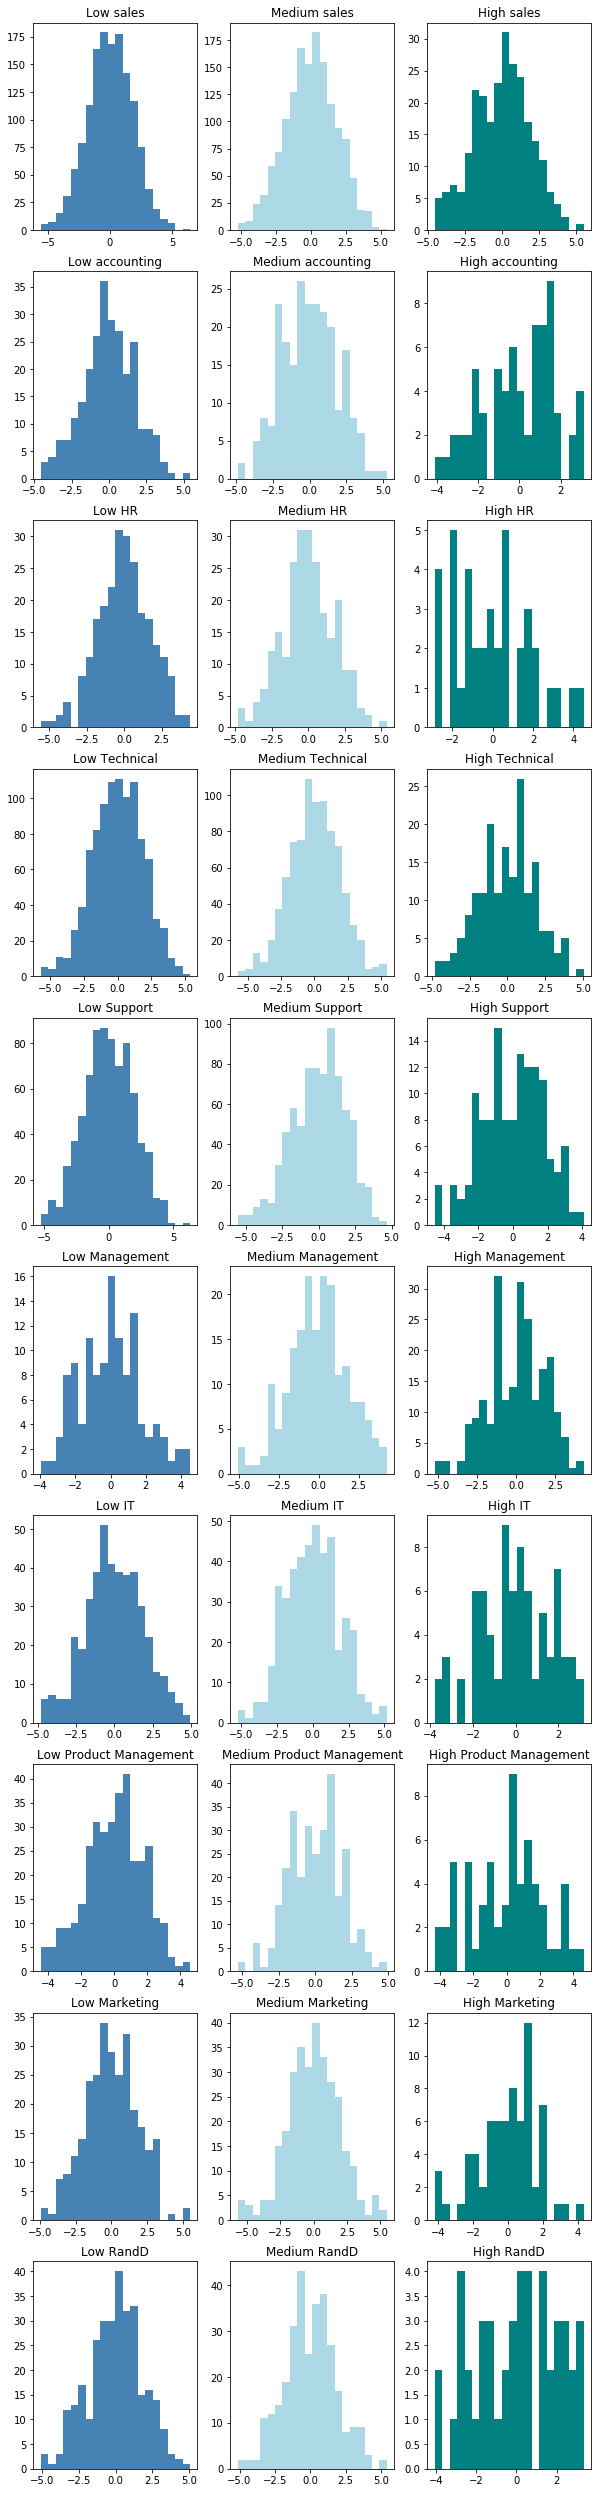

In [255]:
fig = plt.figure(figsize=(10,45))
for i in range(1, 30):
    ax = fig.add_subplot(10, 3, i)
    
    fig.add_subplot(10,3,1)
    plt.hist(low_sales['PM'], bins=20, color='steelblue')
    plt.title('Low sales')
    fig.add_subplot(10,3,2)
    plt.hist(medium_sales['PM'], bins=20, color='lightblue')
    plt.title('Medium sales')
    fig.add_subplot(10,3,3)
    plt.hist(high_sales['PM'], bins=20, color='teal')
    plt.title('High sales')
    
    fig.add_subplot(10,3,4)
    plt.hist(low_accounting['PM'], bins=20, color='steelblue')
    plt.title('Low accounting')
    fig.add_subplot(10,3,5)
    plt.hist(medium_accounting['PM'], bins=20, color='lightblue')
    plt.title('Medium accounting')
    fig.add_subplot(10,3,6)
    plt.hist(high_accounting['PM'], bins=20, color='teal')
    plt.title('High accounting')
    
    fig.add_subplot(10,3,7)
    plt.hist(low_hr['PM'], bins=20, color='steelblue')
    plt.title('Low HR')
    fig.add_subplot(10,3,8)
    plt.hist(medium_hr['PM'], bins=20, color='lightblue')
    plt.title('Medium HR')
    fig.add_subplot(10,3,9)
    plt.hist(high_hr['PM'], bins=20, color='teal')
    plt.title('High HR')
    
    fig.add_subplot(10,3,7)
    plt.hist(low_hr['PM'], bins=20, color='steelblue')
    plt.title('Low HR')
    fig.add_subplot(10,3,8)
    plt.hist(medium_hr['PM'], bins=20, color='lightblue')
    plt.title('Medium HR')
    fig.add_subplot(10,3,9)
    plt.hist(high_hr['PM'], bins=20, color='teal')
    plt.title('High HR')
    
    fig.add_subplot(10,3,10)
    plt.hist(low_technical['PM'], bins=20, color='steelblue')
    plt.title('Low Technical')
    fig.add_subplot(10,3,11)
    plt.hist(medium_technical['PM'], bins=20, color='lightblue')
    plt.title('Medium Technical')
    fig.add_subplot(10,3,12)
    plt.hist(high_technical['PM'], bins=20, color='teal')
    plt.title('High Technical')

    fig.add_subplot(10,3,13)
    plt.hist(low_support['PM'], bins=20, color='steelblue')
    plt.title('Low Support')
    fig.add_subplot(10,3,14)
    plt.hist(medium_support['PM'], bins=20, color='lightblue')
    plt.title('Medium Support')
    fig.add_subplot(10,3,15)
    plt.hist(high_support['PM'], bins=20, color='teal')
    plt.title('High Support')

    fig.add_subplot(10,3,16)
    plt.hist(low_management['PM'], bins=20, color='steelblue')
    plt.title('Low Management')
    fig.add_subplot(10,3,17)
    plt.hist(medium_management['PM'], bins=20, color='lightblue')
    plt.title('Medium Management')
    fig.add_subplot(10,3,18)
    plt.hist(high_management['PM'], bins=20, color='teal')
    plt.title('High Management')

    fig.add_subplot(10,3,19)
    plt.hist(low_IT['PM'], bins=20, color='steelblue')
    plt.title('Low IT')
    fig.add_subplot(10,3,20)
    plt.hist(medium_IT['PM'], bins=20, color='lightblue')
    plt.title('Medium IT')
    fig.add_subplot(10,3,21)
    plt.hist(high_IT['PM'], bins=20, color='teal')
    plt.title('High IT')

    fig.add_subplot(10,3,22)
    plt.hist(low_product_mng['PM'], bins=20, color='steelblue')
    plt.title('Low Product Management')
    fig.add_subplot(10,3,23)
    plt.hist(medium_product_mng['PM'], bins=20, color='lightblue')
    plt.title('Medium Product Management')
    fig.add_subplot(10,3,24)
    plt.hist(high_product_mng['PM'], bins=20, color='teal')
    plt.title('High Product Management')

    fig.add_subplot(10,3,25)
    plt.hist(low_marketing['PM'], bins=20, color='steelblue')
    plt.title('Low Marketing')
    fig.add_subplot(10,3,26)
    plt.hist(medium_marketing['PM'], bins=20, color='lightblue')
    plt.title('Medium Marketing')
    fig.add_subplot(10,3,27)
    plt.hist(high_marketing['PM'], bins=20, color='teal')
    plt.title('High Marketing')
    
    fig.add_subplot(10,3,28)
    plt.hist(low_RandD['PM'], bins=20, color='steelblue')
    plt.title('Low RandD')
    fig.add_subplot(10,3,29)
    plt.hist(medium_RandD['PM'], bins=20, color='lightblue')
    plt.title('Medium RandD')
    fig.add_subplot(10,3,30)
    plt.hist(high_RandD['PM'], bins=20, color='teal')
    plt.title('High RandD')
plt.show()

Below we compute our performance metrics for our potential leavers created earlier. We also identify if there are any above-average performance employees (PM > 0) that are likely to leave that should perhaps be incentivized to remain at the company.

In [30]:
leavers = potential_leavers.drop('left', axis=1)

In [31]:
leavers.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
2011,0.34,0.39,2,136,3,0,0,sales,medium


Below we group our potential leavers in the same way as was done above according to employment categories. Perhaps certain business units have more "likely to leave" individuals that might be indicative of some problem that management might be able to address.

In [32]:
l_low_sales = (leavers[(leavers['sales'] == 'sales') & (leavers['salary'] == 'low')])
l_medium_sales = (leavers[(leavers['sales'] == 'sales') & (leavers['salary'] == 'medium')])
l_high_sales = (leavers[(leavers['sales'] == 'sales') & (leavers['salary'] == 'high')])

l_sales = [len(l_low_sales), len(l_medium_sales), len(l_high_sales)]
l_sales = pd.DataFrame(l_sales)
l_sales.columns = ['sales']
l_sales.index = ['low', 'medium', 'high']

l_low_accounting = (leavers[(leavers['sales'] == 'accounting') & (leavers['salary'] == 'low')])
l_medium_accounting = (leavers[(leavers['sales'] == 'accounting') & (leavers['salary'] == 'medium')])
l_high_accounting = (leavers[(leavers['sales'] == 'accounting') & (leavers['salary'] == 'high')])

l_accounting = [len(l_low_accounting), len(l_medium_accounting), len(l_high_accounting)]
l_accounting = pd.DataFrame(l_accounting)
l_accounting.columns = ['accounting']
l_accounting.index = ['low', 'medium', 'high']

l_low_hr = (leavers[(leavers['sales'] == 'hr') & (leavers['salary'] == 'low')])
l_medium_hr = (leavers[(leavers['sales'] == 'hr') & (leavers['salary'] == 'medium')])
l_high_hr = (leavers[(leavers['sales'] == 'hr') & (leavers['salary'] == 'high')])

l_hr = [len(l_low_hr), len(l_medium_hr), len(l_high_hr)]
l_hr = pd.DataFrame(l_hr)
l_hr.columns = ['hr']
l_hr.index = ['low', 'medium', 'high']

l_low_technical = (leavers[(leavers['sales'] == 'technical') & (leavers['salary'] == 'low')])
l_medium_technical = (leavers[(leavers['sales'] == 'technical') & (leavers['salary'] == 'medium')])
l_high_technical = (leavers[(leavers['sales'] == 'technical') & (leavers['salary'] == 'high')])

l_technical = [len(l_low_technical), len(l_medium_technical), len(l_high_technical)]
l_technical = pd.DataFrame(l_technical)
l_technical.columns = ['technical']
l_technical.index = ['low', 'medium', 'high']

l_low_support = (leavers[(leavers['sales'] == 'support') & (leavers['salary'] == 'low')])
l_medium_support = (leavers[(leavers['sales'] == 'support') & (leavers['salary'] == 'medium')])
l_high_support = (leavers[(leavers['sales'] == 'support') & (leavers['salary'] == 'high')])

l_support = [len(l_low_support), len(l_medium_support), len(l_high_support)]
l_support = pd.DataFrame(l_support)
l_support.columns = ['support']
l_support.index = ['low', 'medium', 'high']

l_low_management = (leavers[(leavers['sales'] == 'management') & (leavers['salary'] == 'low')])
l_medium_management = (leavers[(leavers['sales'] == 'management') & (leavers['salary'] == 'medium')])
l_high_management = (leavers[(leavers['sales'] == 'management') & (leavers['salary'] == 'high')])

l_management = [len(l_low_management), len(l_medium_management), len(l_high_management)]
l_management = pd.DataFrame(l_management)
l_management.columns = ['management']
l_management.index = ['low', 'medium', 'high']

l_low_IT = (leavers[(leavers['sales'] == 'IT') & (leavers['salary'] == 'low')])
l_medium_IT = (leavers[(leavers['sales'] == 'IT') & (leavers['salary'] == 'medium')])
l_high_IT = (leavers[(leavers['sales'] == 'IT') & (leavers['salary'] == 'high')])

l_IT = [len(l_low_IT), len(l_medium_IT), len(l_high_IT)]
l_IT = pd.DataFrame(l_IT)
l_IT.columns = ['IT']
l_IT.index = ['low', 'medium', 'high']

l_low_product_mng = (leavers[(leavers['sales'] == 'product_mng') & (leavers['salary'] == 'low')])
l_medium_product_mng = (leavers[(leavers['sales'] == 'product_mng') & (leavers['salary'] == 'medium')])
l_high_product_mng = (leavers[(leavers['sales'] == 'product_mng') & (leavers['salary'] == 'high')])

l_product_mng = [len(l_low_product_mng), len(l_medium_product_mng), len(l_high_product_mng)]
l_product_mng = pd.DataFrame(l_product_mng)
l_product_mng.columns = ['product_mng']
l_product_mng.index = ['low', 'medium', 'high']

l_low_marketing = (leavers[(leavers['sales'] == 'marketing') & (leavers['salary'] == 'low')])
l_medium_marketing = (leavers[(leavers['sales'] == 'marketing') & (leavers['salary'] == 'medium')])
l_high_marketing = (leavers[(leavers['sales'] == 'marketing') & (leavers['salary'] == 'high')])

l_marketing = [len(l_low_marketing), len(l_medium_marketing), len(l_high_marketing)]
l_marketing = pd.DataFrame(l_marketing)
l_marketing.columns = ['marketing']
l_marketing.index = ['low', 'medium', 'high']

l_low_RandD = (leavers[(leavers['sales'] == 'RandD') & (leavers['salary'] == 'low')])
l_medium_RandD = (leavers[(leavers['sales'] == 'RandD') & (leavers['salary'] == 'medium')])
l_high_RandD = (leavers[(leavers['sales'] == 'RandD') & (leavers['salary'] == 'high')])

l_RandD = [len(l_low_RandD), len(l_medium_RandD), len(l_high_RandD)]
l_RandD = pd.DataFrame(l_RandD)
l_RandD.columns = ['RandD']
l_RandD.index = ['low', 'medium', 'high']

l_employment = [l_sales, l_accounting ,l_hr ,l_technical ,l_support ,l_management ,l_IT,
l_product_mng, l_marketing, l_RandD]
l_employment = pd.concat(l_employment, axis=1)
l_employment

,sales,accounting,hr,technical,support,management,IT,product_mng,marketing,RandD
low,20,5,2,15,6,1,4,6,3,9
medium,10,6,3,7,10,2,5,3,2,4
high,0,0,0,2,1,0,2,0,0,0


From the below chart we can see that the potential leavers are more or less distributed in the same way as our complete employment chart we created above. We see that "low sales", "low technical", "medium sales" and "medium support" make up a large percentage of potential leaving employees.

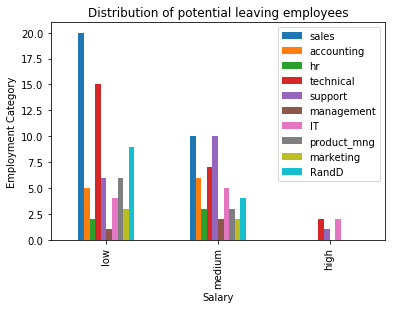

In [340]:
l_employment.plot(kind='bar', title='Distribution of potential leaving employees')
plt.xlabel('Salary')
plt.ylabel('Employment Category')
plt.show()

First we create a total dataframe that contains concatenated together, all our "staying" employees' records, with performance metrics. We then do the same for our potential leaving employees. Finally we merge on the index record number and sort by performance metric in descending order.

In [33]:
total = [low_sales,low_sales,high_sales,low_accounting,medium_accounting,high_accounting,low_hr,
               medium_hr,high_hr,low_technical,medium_technical,high_technical,low_support,medium_support,
               high_support,low_management,medium_management,high_management,low_IT,medium_IT,high_IT,
               low_product_mng,medium_product_mng,high_product_mng,low_marketing,medium_marketing,high_marketing,
                low_RandD,medium_RandD,high_RandD]
total = pd.concat(total, axis=0)

l_total = [l_low_sales,l_low_sales,l_high_sales,l_low_accounting,l_medium_accounting,l_high_accounting,l_low_hr,
               l_medium_hr,l_high_hr,l_low_technical,l_medium_technical,l_high_technical,l_low_support,l_medium_support,
               l_high_support,l_low_management,l_medium_management,l_high_management,l_low_IT,l_medium_IT,l_high_IT,
               l_low_product_mng,l_medium_product_mng,l_high_product_mng,l_low_marketing,l_medium_marketing,l_high_marketing,
                l_low_RandD,l_medium_RandD,l_high_RandD]
l_total = pd.concat(l_total, axis=0)

Below we can see the likely to leave employees sorted by performance (the top 25). Regarding the performance metric: it is the sum of the standard deviations over 3 performance metrics. This means that any employee scoring > 2 on the performance metric is offering the company, in general, performance that is quite high above the average employee performance and dramatically higher performance than employees that have large negative scores on this metric. Note that the indexes correspond to those of employee records in the dataset in its original form.

In [34]:
total['index'] = total.index
l_total['index'] = l_total.index
sorted_leavers = pd.merge(l_total, total, on=['index', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                                             'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary'], how='inner')
sorted_leavers.index = sorted_leavers['index']
sorted_leavers = sorted_leavers.drop('index', axis=1)
sorted_leavers = sorted_leavers.sort_values('PM', axis=0, ascending=False)
sorted_leavers = sorted_leavers[['PM', 'satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary']]
sorted_leavers.head(10)

,PM,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
index,,,,,,,,,,
6189,4.256885,0.15,0.91,6,281,3,0,0,marketing,low
10294,3.788697,0.16,0.97,6,282,4,0,0,product_mng,low
8489,3.385636,0.25,0.98,6,287,5,1,0,sales,low
8489,3.385636,0.25,0.98,6,287,5,1,0,sales,low
8489,3.385636,0.25,0.98,6,287,5,1,0,sales,low
8489,3.385636,0.25,0.98,6,287,5,1,0,sales,low
7244,3.233226,0.14,0.99,6,251,4,0,0,product_mng,low
2206,3.012980,0.16,0.98,5,284,5,0,0,IT,medium
6012,2.887563,0.17,0.94,5,273,4,0,0,technical,medium


Now that we have identified high-performing, likely to leave individuals, we take a look at the company's outperformers (top performers over all units) and underperformers (lowest performers over all units) according to our performance metric. These are the employees that offer performance very far above average performance or very far below average performance.

In [35]:
outperformers = total.drop('index', axis=1)
outperformers = outperformers[['PM', 'satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary']]
outperformers = outperformers.sort_values('PM', axis=0, ascending=False)
print("==============================")
print("OUTPERFORMERS")
print("==============================")
outperformers.head(10)

OUTPERFORMERS


,PM,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
3595,6.455190,0.32,0.97,6,272,2,0,0,sales,low
3595,6.455190,0.32,0.97,6,272,2,0,0,sales,low
7147,6.299658,0.36,0.95,6,276,2,0,0,support,low
9709,5.510414,0.59,0.94,5,274,2,0,0,sales,high
11433,5.494044,0.75,0.89,6,250,2,0,0,marketing,medium
13644,5.494044,0.75,0.89,6,250,2,0,0,marketing,medium
10838,5.478701,0.73,0.98,5,272,2,0,0,marketing,low
13049,5.478701,0.73,0.98,5,272,2,0,0,marketing,low
6600,5.453889,0.86,0.95,5,275,2,0,0,technical,medium
8503,5.429159,0.76,1.00,5,265,2,0,0,accounting,low


In [36]:
underperformers = total.drop('index', axis=1)
underperformers = underperformers[['PM', 'satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary']]
underperformers = underperformers.sort_values('PM', axis=0, ascending=True)
print("==============================")
print("UNDERPERFORMERS")
print("==============================")
underperformers.head(10)

UNDERPERFORMERS


,PM,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
7288,-5.764279,0.71,0.43,2,100,6,0,0,technical,medium
2475,-5.699799,0.32,0.42,2,99,4,0,0,technical,low
13493,-5.677463,0.61,0.42,2,103,8,0,0,marketing,medium
11282,-5.677463,0.61,0.42,2,103,8,0,0,marketing,medium
11895,-5.591802,0.60,0.42,2,109,6,0,0,sales,low
14106,-5.591802,0.60,0.42,2,109,6,0,0,sales,low
11895,-5.591802,0.60,0.42,2,109,6,0,0,sales,low
14106,-5.591802,0.60,0.42,2,109,6,0,0,sales,low
2935,-5.574195,0.29,0.48,2,116,6,1,0,hr,low
10055,-5.566574,0.31,0.37,2,104,3,1,0,support,medium


Below we create some visualizations to get a more global view of employee performance, satisfaction, hours worked and projects completed as a ratio of time spent at the company. We can see that the majority of employees are more satisfied than neutral, we can see that the majority of employees work more than 125 hours on average per month, we see that the majority of employees participate in at least 1 project per year and we see that a very small percentage of employees are promoted every 5 years. We also see a nice normal distribution in our performance metric.

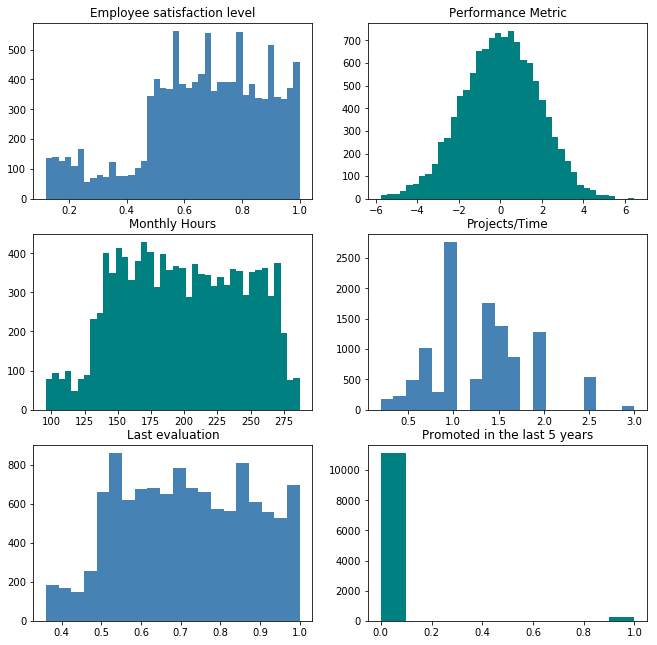

In [426]:
fig = plt.figure(figsize=(11,11))
for i in range(1, 6):
    ax = fig.add_subplot(3, 2, i)
    fig.add_subplot(3,2,1)
    plt.hist(total['satisfaction_level'], bins=40, color='steelblue')
    plt.title('Employee satisfaction level')
    fig.add_subplot(3,2,2)
    plt.hist(total['PM'], bins=40, color='teal')
    plt.title('Performance Metric')
    fig.add_subplot(3,2,3)
    plt.hist(total['average_montly_hours'], bins=40, color='teal')
    plt.title('Monthly Hours')
    fig.add_subplot(3,2,4)
    plt.hist(total['number_project']/total['time_spend_company'], bins=20, color='steelblue')
    plt.title('Projects/Time')
    fig.add_subplot(3,2,5)
    plt.hist(total['last_evaluation'], bins=20, color='steelblue')
    plt.title('Last evaluation')
    fig.add_subplot(3,2,6)
    plt.hist(total['promotion_last_5years'], color='teal')
    plt.title('Promoted in the last 5 years')
plt.show()

To conclude we do some inter-business unit analysis to identify whether any of the business units are leading or lagging overall company averages in hours worked, performance metric and last evaluation. We first compute our global means and then we concatenate together subcategories of the business units to form single entities (e.g low_sales, medium_sales, high_sales = sales). Finally we calculate the spread between each business unit and the company average in standard deviations and visualize the result. 

In [37]:
mean_global_last_evaluation = total['last_evaluation'].mean()
std_global_last_evaluation = total['last_evaluation'].std()

mean_global_project_time = (total['number_project']/total['time_spend_company']).mean()
std_global_project_time = (total['number_project']/total['time_spend_company']).std()

mean_global_avg_hours = total['average_montly_hours'].mean()
std_global_avg_hours = total['average_montly_hours'].std()

mean_global_PM = total['PM'].mean()
std_global_PM = total['PM'].std()

In [38]:
low_sales = (total[(total['sales'] == 'sales') & (total['salary'] == 'low')])
medium_sales = (total[(total['sales'] == 'sales') & (total['salary'] == 'medium')])
high_sales = (total[(total['sales'] == 'sales') & (total['salary'] == 'high')])

b_list = [low_sales, medium_sales, high_sales]
b_sales = pd.concat(b_list, axis=0)

low_accounting = (total[(total['sales'] == 'accounting') & (total['salary'] == 'low')])
medium_accounting = (total[(total['sales'] == 'accounting') & (total['salary'] == 'medium')])
high_accounting = (total[(total['sales'] == 'accounting') & (total['salary'] == 'high')])

b_list = [low_accounting, medium_accounting, high_accounting]
b_accounting = pd.concat(b_list, axis=0)

low_hr = (total[(total['sales'] == 'hr') & (total['salary'] == 'low')])
medium_hr = (total[(total['sales'] == 'hr') & (total['salary'] == 'medium')])
high_hr = (total[(total['sales'] == 'hr') & (total['salary'] == 'high')])

b_list = [low_hr, medium_hr, high_hr]
b_hr = pd.concat(b_list, axis=0)

low_technical = (total[(total['sales'] == 'technical') & (total['salary'] == 'low')])
medium_technical = (total[(total['sales'] == 'technical') & (total['salary'] == 'medium')])
high_technical = (total[(total['sales'] == 'technical') & (total['salary'] == 'high')])

b_list = [low_technical, medium_technical, high_technical]
b_technical = pd.concat(b_list, axis=0)

low_support = (total[(total['sales'] == 'support') & (total['salary'] == 'low')])
medium_support = (total[(total['sales'] == 'support') & (total['salary'] == 'medium')])
high_support = (total[(total['sales'] == 'support') & (total['salary'] == 'high')])

b_list = [low_support, medium_support, high_support]
b_support = pd.concat(b_list, axis=0)

low_management = (total[(total['sales'] == 'management') & (total['salary'] == 'low')])
medium_management = (total[(total['sales'] == 'management') & (total['salary'] == 'medium')])
high_management = (total[(total['sales'] == 'management') & (total['salary'] == 'high')])

b_list = [low_management, medium_management, high_management]
b_management = pd.concat(b_list, axis=0)

low_IT = (total[(total['sales'] == 'IT') & (total['salary'] == 'low')])
medium_IT = (total[(total['sales'] == 'IT') & (total['salary'] == 'medium')])
high_IT = (total[(total['sales'] == 'IT') & (total['salary'] == 'high')])

b_list = [low_IT, medium_IT, high_IT]
b_IT = pd.concat(b_list, axis=0)

low_product_mng = (total[(total['sales'] == 'product_mng') & (total['salary'] == 'low')])
medium_product_mng = (total[(total['sales'] == 'product_mng') & (total['salary'] == 'medium')])
high_product_mng = (total[(total['sales'] == 'product_mng') & (total['salary'] == 'high')])

b_list = [low_product_mng, medium_product_mng, high_product_mng]
b_product_mng = pd.concat(b_list, axis=0)

low_marketing = (total[(total['sales'] == 'marketing') & (total['salary'] == 'low')])
medium_marketing = (total[(total['sales'] == 'marketing') & (total['salary'] == 'medium')])
high_marketing = (total[(total['sales'] == 'marketing') & (total['salary'] == 'high')])

b_list = [low_marketing, medium_marketing, high_marketing]
b_marketing = pd.concat(b_list, axis=0)

low_RandD = (total[(total['sales'] == 'RandD') & (total['salary'] == 'low')])
medium_RandD = (total[(total['sales'] == 'RandD') & (total['salary'] == 'medium')])
high_RandD = (total[(total['sales'] == 'RandD') & (total['salary'] == 'high')])

b_list = [low_RandD, medium_RandD, high_RandD]
b_RandD = pd.concat(b_list, axis=0)

In [39]:
sales_last_evaluation = (b_sales['last_evaluation'].mean() - mean_global_last_evaluation) / std_global_last_evaluation
sales_project_time = (((b_sales['number_project']/b_sales['time_spend_company']).mean()) - mean_global_project_time) / std_global_project_time
sales_avg_hours = (b_sales['average_montly_hours'].mean() - mean_global_avg_hours) / std_global_avg_hours
sales_PM = ((b_sales['PM'].mean()) - mean_global_PM) / std_global_PM
sales_perf = sales_last_evaluation + sales_project_time + sales_avg_hours + sales_PM

accounting_last_evaluation = (b_accounting['last_evaluation'].mean() - mean_global_last_evaluation) / std_global_last_evaluation
accounting_project_time = (((b_accounting['number_project']/b_accounting['time_spend_company']).mean()) - mean_global_project_time) / std_global_project_time
accounting_avg_hours = (b_accounting['average_montly_hours'].mean() - mean_global_avg_hours) / std_global_avg_hours
accounting_PM = ((b_accounting['PM'].mean()) - mean_global_PM) / std_global_PM
accounting_perf = accounting_last_evaluation + accounting_project_time + accounting_avg_hours + accounting_PM

hr_last_evaluation = (b_hr['last_evaluation'].mean() - mean_global_last_evaluation) / std_global_last_evaluation
hr_project_time = (((b_hr['number_project']/b_hr['time_spend_company']).mean()) - mean_global_project_time) / std_global_project_time
hr_avg_hours = (b_hr['average_montly_hours'].mean() - mean_global_avg_hours) / std_global_avg_hours
hr_PM = ((b_hr['PM'].mean()) - mean_global_PM) / std_global_PM
hr_perf = hr_last_evaluation + hr_project_time + hr_avg_hours + hr_PM

technical_last_evaluation = (b_technical['last_evaluation'].mean() - mean_global_last_evaluation) / std_global_last_evaluation
technical_project_time = (((b_technical['number_project']/b_technical['time_spend_company']).mean()) - mean_global_project_time) / std_global_project_time
technical_avg_hours = (b_technical['average_montly_hours'].mean() - mean_global_avg_hours) / std_global_avg_hours
technical_PM = ((b_technical['PM'].mean()) - mean_global_PM) / std_global_PM
technical_perf = technical_last_evaluation + technical_project_time + technical_avg_hours + technical_PM

support_last_evaluation = (b_support['last_evaluation'].mean() - mean_global_last_evaluation) / std_global_last_evaluation
support_project_time = (((b_support['number_project']/b_support['time_spend_company']).mean()) - mean_global_project_time) / std_global_project_time
support_avg_hours = (b_support['average_montly_hours'].mean() - mean_global_avg_hours) / std_global_avg_hours
support_PM = ((b_support['PM'].mean()) - mean_global_PM) / std_global_PM
support_perf = support_last_evaluation + support_project_time + support_avg_hours + support_PM

management_last_evaluation = (b_management['last_evaluation'].mean() - mean_global_last_evaluation) / std_global_last_evaluation
management_project_time = (((b_management['number_project']/b_management['time_spend_company']).mean()) - mean_global_project_time) / std_global_project_time
management_avg_hours = (b_management['average_montly_hours'].mean() - mean_global_avg_hours) / std_global_avg_hours
management_PM = ((b_management['PM'].mean()) - mean_global_PM) / std_global_PM
management_perf = management_last_evaluation + management_project_time + management_avg_hours + management_PM


IT_last_evaluation = (b_IT['last_evaluation'].mean() - mean_global_last_evaluation) / std_global_last_evaluation
IT_project_time = (((b_IT['number_project']/b_IT['time_spend_company']).mean()) - mean_global_project_time) / std_global_project_time
IT_avg_hours = (b_IT['average_montly_hours'].mean() - mean_global_avg_hours) / std_global_avg_hours
IT_PM = ((b_IT['PM'].mean()) - mean_global_PM) / std_global_PM
IT_perf = IT_last_evaluation + IT_project_time + IT_avg_hours + IT_PM

product_mng_last_evaluation = (b_product_mng['last_evaluation'].mean() - mean_global_last_evaluation) / std_global_last_evaluation
product_mng_project_time = (((b_product_mng['number_project']/b_product_mng['time_spend_company']).mean()) - mean_global_project_time) / std_global_project_time
product_mng_avg_hours = (b_product_mng['average_montly_hours'].mean() - mean_global_avg_hours) / std_global_avg_hours
product_mng_PM = ((b_product_mng['PM'].mean()) - mean_global_PM) / std_global_PM
product_mng_perf = product_mng_last_evaluation + product_mng_project_time + product_mng_avg_hours + product_mng_PM

marketing_last_evaluation = (b_marketing['last_evaluation'].mean() - mean_global_last_evaluation) / std_global_last_evaluation
marketing_project_time = (((b_marketing['number_project']/b_marketing['time_spend_company']).mean()) - mean_global_project_time) / std_global_project_time
marketing_avg_hours = (b_marketing['average_montly_hours'].mean() - mean_global_avg_hours) / std_global_avg_hours
marketing_PM = ((b_marketing['PM'].mean()) - mean_global_PM) / std_global_PM 
marketing_perf = marketing_last_evaluation + marketing_project_time + marketing_avg_hours + marketing_PM

RandD_last_evaluation = (b_RandD['last_evaluation'].mean() - mean_global_last_evaluation) / std_global_last_evaluation
RandD_project_time = (((b_RandD['number_project']/b_RandD['time_spend_company']).mean()) - mean_global_project_time) / std_global_project_time
RandD_avg_hours = (b_RandD['average_montly_hours'].mean() - mean_global_avg_hours) / std_global_avg_hours
RandD_PM = ((b_RandD['PM'].mean()) - mean_global_PM) / std_global_PM
RandD_perf = RandD_last_evaluation + RandD_project_time + RandD_avg_hours + RandD_PM

In [42]:
unit_performance = [sales_perf, accounting_perf, hr_perf, technical_perf, support_perf, management_perf, IT_perf, product_mng_perf,
                   marketing_perf, RandD_perf]
unit_performance = pd.DataFrame(unit_performance)
unit_performance.index = ['Sales', 'Accounting', 'Human Resources', 'Technical', 'Support', 'Management', 'IT', 'Product Management',
                   'Marketing', 'RandD']

Below we see that the "Support" unit offers performance 0.10 standard deviations over the company average, whilst the management unit offers -0.20 standard deviations below the company average. It should be noted that these standard deviations values are relatively small but the representation below does allow us to draw some conclusions regarding relative business unit performance.

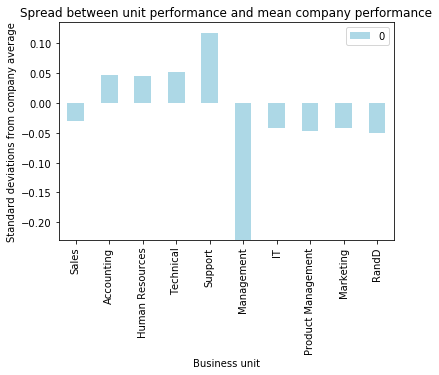

In [48]:
unit_performance.plot(kind='bar', title='Spread between unit performance and mean company performance', color='lightblue')
plt.xlabel('Business unit')
plt.ylabel('Standard deviations from company average')
plt.show()